# Análise Exploratória: Desenvolvendo Softwares

## Introdução

Nesse projeto iremos desenvolver um relatório para uma empresa de desenvolvimento de softwares para demonstrar a importancia da Análise de Dados durante o desenvolvimento de um software ao longo de um mês (Agosto de 2022).

Iniciaremos importando as bibliotecas necessárias que nesse caso utlizaremos a Pandas e a Matplotlib.

In [1]:
# Importando as bibliotecas necessárias:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Criando o DataFrame:
base = pd.read_csv('Relatorio_de_progresso.csv', sep=';', encoding='latin-1')
base_data = pd.DataFrame(base)

Se fez necessário utilizar o encoding latin-1 pois no arquivo .csv existem alguns caracteres que não são reconhecidos pelo padrão UTF-8.

In [5]:
# Visualizando os primeiros 5 registros utilizando o HEAD:
base_data.head(5)

,Dia,Horas Trabalhadas,Bugs Corrigidos,Tarefas Concluídas
0,Segunda-Feira,6,3,5
1,Terça-Feira,7,2,4
2,Quarta-Feira,8,1,6
3,Quinta-Feira,6,4,4
4,Sexta-Feira,7,3,5


In [ ]:
# Checando dimensões dos dados carregados:
base_data.shape

(30, 4)

In [ ]:
# Verificando as informações dos dados:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Dia                 30 non-null     object
 1   Horas Trabalhadas   30 non-null     int64 
 2   Bugs Corrigidos     30 non-null     int64 
 3   Tarefas Concluídas  30 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


Nessas informações vemos que nossos dados estão em ótimas condições sem valores nulos como podemos ver que temos 30 entradas/registros e nas quadro colunas estão com 30 valores _non-null_. Com isso podemos prosseguir com nossa análise.

⚠️ OBSERVAÇÃO

Para preservação dos dados originais, poderíamos criar uma cópia, mas como não iremos fazer nenhum tratamento na base em questão, constinuaremos da forma que está.

## Análises

A partir daqui seguiremos na busca de respostas para as seguintes questões:

_1 - Total de Horas Trabalhadas_

_2 - Média Diária de Horas Trabalhadas_

_3 - Total de Bugs Corrigidos_

_4 - Média Diária de Bugs Corrigidos_

_5 - Total de Tarefas Concluídas_

_6 - Média Diária de Tarefas Concluídas_

_7 - Produtividade Diária (Tarefas Concluídas por Hora)_

Responderemos atribuindo as respostas á variáveis para assim facilitar a reutilização de resultados em outras análises.

In [12]:
# No total de horas trabalhadas temos:
horas_total = base_data['Horas Trabalhadas'].sum()
horas_total

122

In [11]:
# Média diária de horas trabalhadas
m_horas = base_data['Horas Trabalhadas'].mean()
m_horas

4.066666666666666

In [10]:
# Total de bugs corrigidos
bugs_total = base_data['Bugs Corrigidos'].sum()
bugs_total

72

In [9]:
# Média diária de bugs corrigidos
m_bugs = base_data['Bugs Corrigidos'].mean()
m_bugs

2.4

In [13]:
# Total de tarefas concluídas
tarefas_total = base_data['Tarefas Concluídas'].sum()
tarefas_total

139

In [45]:
# Média diária de tarefas concluídas
m_tarefas = base_data['Tarefas Concluídas'].mean()
m_tarefas

4.633333333333334

In [52]:
# Produtividade Diária (Tarefas Concluídas por Hora)
produtividade = tarefas_total / horas_total
produtividade

1.139344262295082

Perguntas respondidas e a princípio sem sentido. Então vamos construir alguns gráficos para tornar essas respostas um pouco mais visuais.

Nestes gráficos vamos ser breves e usar apenas as médias por enquanto. Com isso, precisaremos de uma coluna DATA no formato inteiro (int64), pois a coluna DIA que temos está escrito (object) e pode causar confusões no gráfico.

In [7]:
# Criar uma nova coluna no DataFrame para enumerar os dias para facilitar na montagem dos gráficos
base_data['Data'] = pd.Series(range(1,31))

### Quantidade de Bugs Corrigidos por Dia

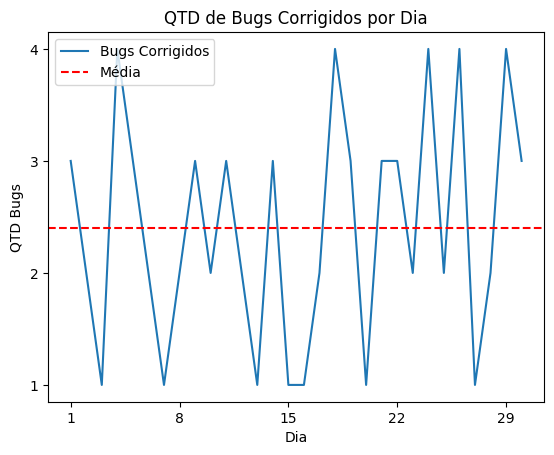

In [16]:
# Variáveis utilizadas
x = base_data['Data']
y = base_data['Bugs Corrigidos']
z = m_bugs

# Construindo o subplot/gráfico
fig, varx = plt.subplots()
varx.plot(x, y, label='Bugs Corrigidos')
varx.axhline(z, color='red', linestyle='--', label='Média') # Linha de média
varx.set_xlabel('Dia')
varx.set_ylabel('QTD Bugs')
varx.set_title('QTD de Bugs Corrigidos por Dia')
varx.set_xticks([1,8,15,22,29]) # Alterando os índices do eixo X separando por semana
varx.set_yticks([1,2,3,4]) # Alterando os índices do eixo Y
varx.legend()
plt.show()

Neste gráfico mostramos a relação de bugs corrigidos por dia e separamos os índices do eixo X em semanas. Com isso, podemos ver que na primeira semana tivemos uma varição grande de bugs corrigidos mas sua maioria abaixo da média diária (linha tracejada). Tivemos uma leve melhoria na terceira semana de trabalho e mais ainda na quarta semana ficando quase que sempre acima ou próximo á média diária.

### Produção por Hora Trabalhada

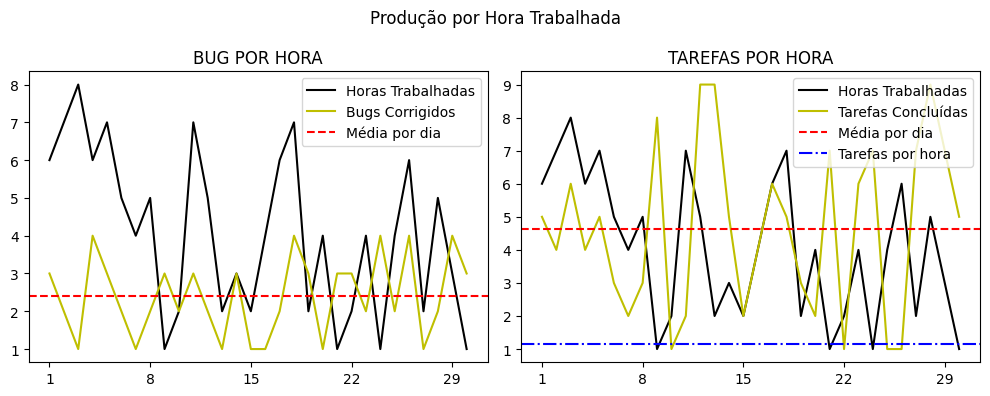

In [58]:
# Variáveis utilizadas
x1 = base_data['Horas Trabalhadas']
x2 = base_data['Bugs Corrigidos']
x3 = base_data['Tarefas Concluídas']
x4 = base_data['Data']
z1 = m_bugs # Média de bugs corrigidos por dia
z2 = m_tarefas # Média de tarefas concluidas por dia
z3 = produtividade # Produtividade diária TAREFAS/HORA

# Criando uma figura com 1 linha e 2 colunas de subplots/gráficos
fig, ax = plt.subplots(1, 2, figsize = (10,4))
plt.suptitle('Produção por Hora Trabalhada')

# Adicionando dados ao primeiro subplot/gráfico (posição 0)
ax[0].plot(x4, x1, color='k', label='Horas Trabalhadas')
ax[0].plot(x4, x2, color='y', label='Bugs Corrigidos')
ax[0].axhline(z1, color='r', linestyle='--', label='Média por dia')
ax[0].set_title('BUG POR HORA')
ax[0].set_xticks([1,8,15,22,29]) # Alterando os índices do eixo X separando por semana
ax[0].legend()

# Adicionando dados ao segundo subplot/gráfico (posição 1)
ax[1].plot(x4, x1, color='k', label='Horas Trabalhadas')
ax[1].plot(x4, x3, color='y', label='Tarefas Concluídas')
ax[1].axhline(z2, color='r', linestyle='--', label='Média por dia')
ax[1].axhline(z3, color='b', linestyle='-.', label='Tarefas por hora')
ax[1].set_title('TAREFAS POR HORA')
ax[1].set_xticks([1,8,15,22,29]) # Alterando os índices do eixo X separando por semana
ax[1].legend()

# Ajustando o layout da figura para melhor visualização
plt.tight_layout()

# Mostrando o gráfico
plt.show()

Já nestes gráficos buscamos comparar as horas trabalhadas com os bugs corrigidos e tarefas concluídas a fim de encontrar possíveis relações entre eles.

No primeiro, vemos que não uma relação próxima, pois as horas trabalhadas na maioria dos dias estiveram distantes da quantidade de bugs corrigidos e ficando muito próximos somente nas semanas 3 e 4. Vemos também que nesses pontos de proximidade há uma aversão entre as horas e bugs corrigidos, pois enquanto a quantidade de bugs corrigidos estão abaixo da média diária a quantidade de horas trabalhadas está acima da média e assim vice-versa assim como também tivemos alguns dias nessas mesmas semanas que houve uma relação de horas para bugs corrigidos. Nesses casos, teríamos que analisar outros indicadores para buscar resultados mais precisos do que estava afetando essa produtividade nos bugs.

No segundo gráfico, já vemos  que na primeira semana houve uma relação de horas por tarefas concluidas e que também foram caindo a cada dia indo em direção a linha de produtividade diária (Total de tarefas / total de horas). Na segunda semana já vemos uma melhora significativa que levou a quantidade de tarefas concluídas acima da média diária e em uma quantidade de horas muito baixa que é o caso do dia 9 podendo até ser considerado um outlier pois foi um resultado muito atípico e no dia seguinte já levando á um resultado ruim. O que levou a esse ótimo resultado em poucos dias só conseguimos saber analisando outros indicadores de produtividade. Nas semanas 3 e 4 há uma variação muito grande de resultados mas sempre com um bom alcance pois a horas estiveram por bastante tempo entre as linhas de média e de produtividade enquanto a quantidade de tarefas concluídas estiveram na maioria dos dias em alta.

## Conclusões

Com os insights adquiridos através deste breve estudo, podemos compreender a importância da análise exploratória de dados. Essa etapa é fundamental em qualquer projeto ou pesquisa, pois nos permite obter uma compreensão mais profunda dos dados e identificar padrões, tendências e informações relevantes.

Além disso, a análise exploratória nos permite comunicar os resultados de maneira mais clara e efetiva, tornando a informação acessível a todas as partes interessadas.

Portanto, não devemos subestimar a importância dessa etapa inicial, pois ela é a base para uma análise mais profunda e informada, proporcionando insights valiosos que podem direcionar as decisões e ações futuras. É uma ferramenta poderosa que nos ajuda a transformar dados brutos em conhecimentos relevantes e acionáveis.